# Semianr 9 - Applied Quantitative Logistics

In [13]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Hub Location Allocation

In [14]:
def hubLocation():
    
    ### Customer Data
    xc = [74, 146, 41, 70, 176, 60, 1, 54, 149, 60, 132, 199, 2,
          31, 176, 127, 71, 78, 71, 151, 145, 37, 157, 139, 27,
          138, 97, 104, 137, 83, 67, 196, 152, 149, 148, 56, 64, 31, 31, 52]
    
    yc = [79, 95, 149, 185, 106, 175, 144, 63, 165, 81, 164, 132, 110, 118,
          29, 13, 52, 158, 73, 172, 103, 172, 69, 90, 104, 102, 70, 162, 192,
          195, 178, 153, 41, 57, 67, 5, 83, 146, 122, 2]
    
    d = [20, 15, 99, 32, 12, 8, 86, 26, 56, 38, 27, 15, 87, 83, 94, 34, 79,
         56, 10, 46, 99, 67, 43, 84, 45, 81, 83, 89, 30, 78, 78, 21, 75, 93,
         70, 16, 20, 48, 88, 54]
    
    N = len(xc)     # Number of customers
    
    ### Service Center Data
    xs = [2, 52, 166, 126, 100, 165, 198, 76, 76, 105, 44,
          125, 82, 25, 5, 58, 74, 75, 171, 51]
    
    ys = [126, 196, 104, 28, 4, 32, 122, 35, 123, 45, 2, 158,
          25, 101, 109, 74, 102, 159, 42, 100]
    
    M = len(xs)     # Number of potential service centers
    
    D = np.zeros([N-1, M-1])
    for i in range(N-1):
        for j in range(M-1):
            D[i][j] = math.sqrt(abs(xc[i]-xs[j] + yc[i]-ys[j]))
    
    model = {'N': N,
             'M': M,
             'xc': xc,
             'yc': yc,
             'xs': xs,
             'ys': ys,
             'd': d,
             'D': D}
    
    return model

In [15]:
# model = hubLocation()

In [16]:
# Distance between customer 4 and service cemter 8

# model['D'][4][8]

### Create Random Solution

In [17]:
def createRandomSolution(model):
    M = model['M']
    f = list(np.random.randint(0, 2, M))
    
    return f

### Cost Function

In [18]:
def myCost(f, model):
    
    global NFE
    
    if pd.isna(NFE):
        NFE = 0
        
    NFE += 1
    
    if (np.all(np.array(f) == 0)):
        z = math.inf
        return z
    
    N = model['N']
    M = model['M']
    D = model['D']
    
    D_min = np.zeros(N)
    
    for i in range(0, N-1):
        D_temp = []
        for j in range(0, M-1):
            if f[j] == 1:
                D_temp.append(D[i][j])
                
        D_min[i] = min(D_temp)
        
    z = sum(np.array(model['d']) * np.array(D_min))
    
    return z

### Sorting Population

In [19]:
# Sort the population and cost (based on the cost)
def pop_sort(p, c):
    li = []
    for i in range(len(c)):
        li.append([c[i],i])
        
    li.sort()
    sort_index = []
    
    for x in li:
        sort_index.append(x[1])
    
    positions, cost = [], []
    for i in sort_index:
        positions.append(p[i])
        cost.append(c[i])
        
    return positions, cost

### Roullete Wheel Selection

In [20]:
def rouletteWheelSelection(p):
    r = random.random()
    
    c = np.cumsum(p)
    
    indexes = [
    index for index in range(len(c))
    if c[index] > r
    ]
    
    return indexes[0]

### Crossover

In [21]:
# Uniform Crossover is better than double point crossover better than single point crossover

# Single point crossover
def singlePoint_crossover(x1, x2):
    index = int(np.random.randint(1, len(x1)-1, size=1))
    
    y1 = x1[:index] + x2[index:]
    y2 = x2[:index] + x1[index:]
    
    return y1, y2

# Double Point Crossover
def doublePoint_crossover(x1, x2):
    ind = random.sample(range(1, len(x1)-1), 2)
    
    index1 = min(ind)
    index2 = max(ind)
    
    # Another way is to generate sequence from, 1 to len(x1)-1 then shuffle it
    # Then select first two elements (it won't be the same at all) --> my_ind = list(range(1, len(x1)-1))
    # random.shuffle(my_list)
    y1 = x1[:index1] + x2[index1:index2] + x1[index2:]
    y2 = x2[:index1] + x1[index1:index2] + x2[index2:]
    
    return y1, y2

# Uniform Crossover
def uniform_crossover(x1, x2):
    alpha = list(np.random.randint(2, size=len(x1)))
    
    y1 = list(np.multiply(alpha, x1) + (1-np.array(alpha)) * np.array(x2))
    y2 = list(np.multiply(alpha, x2) + (1-np.array(alpha)) * np.array(x1))
    
    return y1, y2

def CrossOver(x1, x2):
    
    pSinglePoint = 0.1
    pDoublePoint = 0.2
    pUniform = 1-pSinglePoint-pDoublePoint
    
    METHOD = rouletteWheelSelection([pSinglePoint, pDoublePoint, pUniform])
    
    if METHOD == 0:
        y1, y2 = singlePoint_crossover(x1, x2)
    elif METHOD == 1:
        y1, y2 = doublePoint_crossover(x1, x2)
    elif METHOD == 2:
        y1, y2 = uniform_crossover(x1, x2)
    
    return y1, y2

### Mutation

In [22]:
def Mutation(x):
    index = int(np.random.randint(0, len(x), size=1))
    
    y = x.copy()
    
    y[index] = 1-x[index]
    
    return y

### GA Algorithm

In [23]:
### Problem Parameters Definition ###

model = hubLocation()

nVar = model['M']       # Number of decision variables

global NFE
NFE = 0

### GA Parameters ###
maxIt = 75     # Maximum numner of iterations
nPop = 20       # Population size 

pc = 0.8                   # Crossover percentage
nc = 2*round(pc*nPop/2)    # Number of offsprings (parents)

pm = 0.3                   # Mutation percentage
nm = round(pm*nPop)        # Number of mutants2 = unifrnd(0,2 = unifrnd(0,

### Initialization ###
pop, costs = [], []

for i in range(0, nPop):
    pop.append(createRandomSolution(model))
    costs.append(myCost(pop[i], model))

# Sort the population and costs
pop, costs = pop_sort(pop, costs)

#  Store the best solution
bestSolution = [pop[0]]

# Array to hold best cost values
bestCosts = [costs[0]]

# Store the NFE into the array
nfe = [NFE]

### Main Loop ###
for it in range(1, maxIt):
    
    # Crossover
    popc, popc_cost = [], []
    for k in range(1, int(nc/2)):
        
        # Select parent indices
        rand1 = int(np.random.randint(nPop, size=1))
        rand2 = int(np.random.randint(nPop, size=1))
        
        # Select parents
        p1 = pop[rand1]
        p2 = pop[rand2]
        
        # Apply crossover
#         y1, y2 = singlePoint_crossover(p1, p2)
#         y1, y2 = doublePoint_crossover(p1, p2)
#         y1, y2 = uniform_crossover(p1, p2)

        y1, y2 = CrossOver(p1, p2)
        
        # Store the offspring after crossover
        popc.append(y1)
        popc.append(y2)
        
        # Evaluate the offspring
        popc_cost.append(myCost(y1, model))
        popc_cost.append(myCost(y2, model))
        
    # Mutation
    popm, popm_cost = [], []
    for k in range(1, nm):
        
        # Select parent
        rand = int(np.random.randint(nPop, size=1))
        p = pop[rand]
        
        # Apply Mutation
        popm.append(Mutation(p))
        
        # Evaluate the offspring
        popm_cost.append(myCost(popm[-1], model))
        
    # Create merged population
    pop = pop + popm + popc
    costs = costs + popm_cost + popc_cost
    
    # sort the whole population
    pop, costs = pop_sort(pop, costs)
    
    # Truncation
    pop = pop[:nPop]
    costs = costs[:nPop]
    
    # Store the best solution
    bestSolution.append(pop[0])
    
    # Store the best cost
    bestCosts.append(costs[0])
    
    # Append NFE to the array
    nfe.append(NFE)
    
#     if bestCosts[-2] == 0:
#         break
        
    print(f'Iteration {it} : NFE = {nfe[-1]}, Best Cost = {bestCosts[it]}')

Iteration 1 : NFE = 39, Best Cost = 4374.630453184214
Iteration 2 : NFE = 58, Best Cost = 4374.630453184214
Iteration 3 : NFE = 77, Best Cost = 4374.630453184214
Iteration 4 : NFE = 96, Best Cost = 4374.630453184214
Iteration 5 : NFE = 115, Best Cost = 4330.33724863926
Iteration 6 : NFE = 134, Best Cost = 4251.275761421822
Iteration 7 : NFE = 153, Best Cost = 4251.275761421822
Iteration 8 : NFE = 172, Best Cost = 4251.275761421822
Iteration 9 : NFE = 191, Best Cost = 4251.275761421822
Iteration 10 : NFE = 210, Best Cost = 4232.622349106249
Iteration 11 : NFE = 229, Best Cost = 4232.622349106249
Iteration 12 : NFE = 248, Best Cost = 4232.622349106249
Iteration 13 : NFE = 267, Best Cost = 4232.622349106249
Iteration 14 : NFE = 286, Best Cost = 4232.622349106249
Iteration 15 : NFE = 305, Best Cost = 4232.622349106249
Iteration 16 : NFE = 324, Best Cost = 4232.622349106249
Iteration 17 : NFE = 343, Best Cost = 4232.622349106249
Iteration 18 : NFE = 362, Best Cost = 4232.622349106249
Iterat

### Results

Text(0, 0.5, 'Costs')

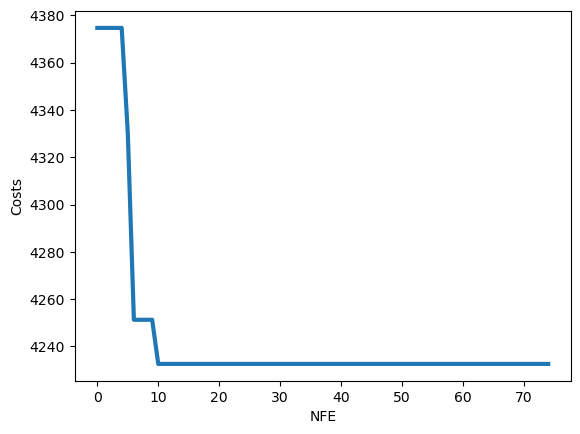

In [24]:
# Plot the result
plt.plot(bestCosts, linewidth = 3)
plt.xlabel('NFE')
plt.ylabel('Costs')

# HW6 - Applied Quantitative Logistics

Solve TSP problem with continues GA algorithm. The solution should be generated in continues values. Use all regular Crossover and Mutation. This type of problem solving has no interfere with permutaion problems.

Hint: Just before calculating the cost, you need to convert the solution into the permutation format. For example:

- Solution in continues format is: [0.111, 0,854, 0,234, 0.542, 0.01]
- The permutation format is: [2, 5, 3, 4, 1]

Instruction for submission:

- Please submit your solutions in (.ipynb) format to my email (msohrabi@hse.ru).

- Deadline: **April 28, 2023, 11:59 pm.**

- The subject of the email and file name: **[HW6_AQL]-YOUR_NAME**

In [25]:
def tsp():
    ### Customer Data
    xc = [74, 146, 41, 70, 176, 60, 1, 54, 149, 60, 132, 199, 2,
          31, 176, 127, 71, 78, 71, 151]
    
    yc = [79, 95, 149, 185, 106, 175, 144, 63, 165, 81, 164, 132, 110, 118,
          29, 13, 52, 158, 73, 172]
    
    d = [20, 15, 99, 32, 12, 8, 86, 26, 56, 38, 27, 15, 87, 83, 94, 34, 79,
         56, 10, 46]
    
    N = len(xc)     # Number of customers
    
    ### Service Center Data
    xs = [2, 52, 166, 126, 100, 165, 198, 76, 76, 105, 44,
          125, 82, 25, 5, 58, 74, 75, 171, 51]
    
    ys = [126, 196, 104, 28, 4, 32, 122, 35, 123, 45, 2, 158,
          25, 101, 109, 74, 102, 159, 42, 100]
    
    M = len(xs)     # Number of potential service centers
    
    D = np.zeros([N, M])
    for i in range(N):
        for j in range(M):
            D[i][j] = math.sqrt((xc[i]-xs[j])**2 + (yc[i]-ys[j])**2)
    
    model = {'N': N,
             'D': D,
             'd': d}
    
    return model

In [26]:
def convertToPermutation(sol):
    sorted_indices = np.argsort(sol)
    permutation = [0] * len(sol)
    for idx in range(len(sol)):
        permutation[sorted_indices[idx]] = idx
    return permutation


In [27]:
def myCost(sol, model):
    tour = convertToPermutation(sol)
    global NFE
    
    if pd.isna(NFE):
        NFE = 0
        
    NFE += 1

    n = model['N']
    tour2 = tour.copy()
    tour2.append(tour[0])
    
    L = 0
    
    for k in range(0, n):
        i = tour2[k]
        j = tour2[k+1]
        
        if len(model['D']) > i and len(model['D'][i]) > j:
            L = L + model['D'][i][j]
        
    return L

In [28]:
def crossover(parent1, parent2, pc):
    child = np.zeros(len(parent1))
    if np.random.rand() < pc:
        cxpt = np.random.randint(0, len(parent1)-1)
        child[0:cxpt+1] = parent1[0:cxpt+1]
        for i in range(len(parent2)):
            if parent2[i] not in child:
                for j in range(len(child)):
                    if child[j] == 0:
                        child[j] = parent2[i]
                        break
    else:
        child = parent1
    return child

def mutation(sol, pm):
    if np.random.rand() < pm:
        pos1, pos2 = np.random.randint(0, len(sol)-1, 2)
        sol[pos1], sol[pos2] = sol[pos2], sol[pos1]
    return sol

In [29]:
def binaryTournament(population, model):
    i, j = random.sample(range(len(population)), 2)
    if myCost(population[i], model) < myCost(population[j], model):
        return i
    else:
        return j

In [30]:
# check if model['D'] matches the size of tour2 or vice versa
def checkSizes(model):
    n = model['N']
    if len(model['D']) != n or len(model['D'][0]) != n:
        # Resize the distance matrix to NxN
        model['D'] = [[model['D'][i][j] for j in range(n)] for i in range(n)]

In [31]:
def geneticAlgorithm(model, maxiter, popSize, pc, pm):

    n = model['N']
    pop = np.zeros((popSize, n))
    for i in range(popSize):
        pop[i] = np.random.permutation(n)

    bestSol = None
    bestCost = math.inf
    global NFE
    NFE = 0
    bestCosts = []
    NFES = []
    for gen in range(maxiter):
        popChild = np.zeros((popSize, n))
        for i in range(popSize):
            p1 = binaryTournament(pop, model)
            p2 = binaryTournament(pop, model)
            child = crossover(pop[p1], pop[p2], pc)
            popChild[i] = mutation(child, pm)
        for i in range(popSize):
            cost = myCost(popChild[i], model)
            if cost < bestCost:
                bestSol = popChild[i]
                bestCost = cost
            bestCosts.append(bestCost)
            NFES.append(NFE)
        pop = np.copy(popChild)
        print('Iteration', gen+1, ':', 'NFE =', NFE, ', Best Cost =', bestCost)
    plt.plot(NFES, bestCosts)
    plt.xlabel('NFE')
    plt.ylabel('Best Cost')
    plt.show()
    return bestSol

Iteration 1 : NFE = 250 , Best Cost = 1577.4266685554296
Iteration 2 : NFE = 500 , Best Cost = 1540.2501294636722
Iteration 3 : NFE = 750 , Best Cost = 1497.590124767436
Iteration 4 : NFE = 1000 , Best Cost = 1479.6905864544376
Iteration 5 : NFE = 1250 , Best Cost = 1377.1413107680403
Iteration 6 : NFE = 1500 , Best Cost = 1377.1413107680403
Iteration 7 : NFE = 1750 , Best Cost = 1218.9062147993957
Iteration 8 : NFE = 2000 , Best Cost = 1218.9062147993957
Iteration 9 : NFE = 2250 , Best Cost = 1218.9062147993957
Iteration 10 : NFE = 2500 , Best Cost = 1218.9062147993957
Iteration 11 : NFE = 2750 , Best Cost = 1218.9062147993957
Iteration 12 : NFE = 3000 , Best Cost = 1218.9062147993957
Iteration 13 : NFE = 3250 , Best Cost = 1218.9062147993957
Iteration 14 : NFE = 3500 , Best Cost = 1218.9062147993957
Iteration 15 : NFE = 3750 , Best Cost = 1218.9062147993957
Iteration 16 : NFE = 4000 , Best Cost = 1218.9062147993957
Iteration 17 : NFE = 4250 , Best Cost = 1183.27179881272
Iteration 18

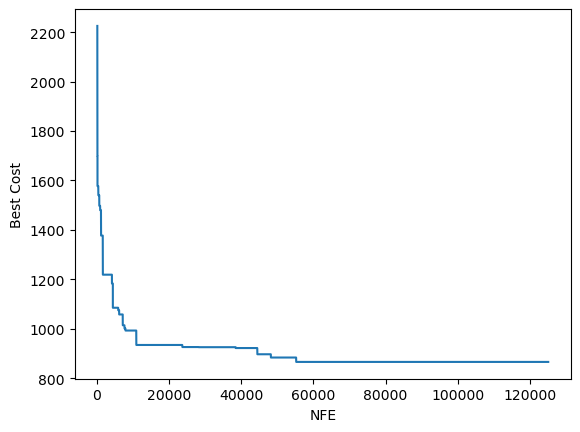

In [32]:
model = tsp()
checkSizes(model)
bestSolution = geneticAlgorithm(model, maxiter=500, popSize=50, pc=0.7, pm=0.3)